In [1]:
import pandas as pd

df_users_limpio = pd.read_csv('Dataset/datos_users_limpio.csv')

### Familiarización con los datos

In [2]:
# Imprimimos todas las columnas del describe
pd.set_option('display.max_columns', 500)

df_users_limpio

,usuario_id,nombre,num_opiniones,util,gracioso,guay,experto,amigos,num_amigos,seguidores,media_puntuacion,like_moda,like_extras,like_perfil,like_formato,like_lista,like_comentario,like_simple,like_guay,like_divertido,like_textos,like_fotos,anyo_reg,mes_reg,dia_reg,hora_reg
0,l6BmjZMeQD3rDxWUbiAiow,Rashmi,95,84,17,25,"2015,2016,2017","c78V-rj8NQcQjOI8KP3UEA, alRMgPcngYSCJ5naFRBz5g...",99,5,4.03,2,0,0,0,0,1,1,1,1,2,0,2013,10,8,23
1,4XChL029mKr5hydo79Ljxg,Jenna,33,48,22,16,Ninguno,"kEBTgDvFX754S68FllfCaA, aB2DynOxNOJK9st2ZeGTPg...",1152,4,3.63,1,0,0,0,0,0,0,1,1,0,0,2013,2,21,22
2,bc8C_eETBWL0olvFSJJd0w,David,16,28,8,10,Ninguno,"4N-HU_T32hLENLntsNKNBg, pSY2vwWLgWfGVAAiKQzMng...",15,0,3.71,0,0,0,0,0,1,0,0,0,0,0,2013,10,4,0
3,dD0gZpBctWGdWo9WlGuhlA,Angela,17,30,4,14,Ninguno,"RZ6wS38wnlXyj-OOdTzBxA, l5jxZh1KsgI8rMunm-GN6A...",525,5,4.85,1,0,0,0,0,0,2,0,0,1,0,2014,5,22,15
4,MM4RJAeH6yuaN8oZDSt0RA,Nancy,361,1114,279,665,"2015,2016,2017,2018","mbwrZ-RS76V1HoJ0bF_Geg, g64lOV39xSLRZO0aQQ6DeQ...",231,39,4.08,28,1,0,0,1,16,57,80,80,25,5,2013,10,23,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1637133,oC4BjbB4I-wx5KBAO1k2Gg,Jiaxin,2,0,0,0,Ninguno,SinAmigos,0,0,4.50,0,0,0,0,0,0,0,0,0,0,0,2016,2,24,19
1637134,LKd_-BT2GMWp8_1ho18kOg,Wes,8,0,0,0,Ninguno,SinAmigos,0,0,4.00,0,0,0,0,0,0,0,0,0,0,0,2017,2,25,23
1637135,ib_elCBhGOamS0AALkh4Og,Lee,4,8,0,0,Ninguno,SinAmigos,0,0,3.40,0,0,0,0,0,0,0,0,0,0,0,2009,8,19,22
1637136,WV27LoSFDG_YmiDKTLKKLA,Melissa,1,1,0,0,Ninguno,SinAmigos,0,0,3.00,0,0,0,0,0,0,0,0,0,0,0,2018,10,15,17


Nos encontramos en un dataset de usuarios, por lo que cada línea fila del dataset es un usuario. Cabe destacar que todos los números de cada fila hacen referencia al total que ese usuario ha tenido en el sistema. Para entender correctamente qué significa cada atributo, vamos a explicarlos uno a uno y a exponer algunas suposición que nos hacemos apriori:

- **num_opiniones**: Opiniones que el usuario ha hecho en total a lo largo de su trayectoria. Un número elevado de opiniones puede significar muchos años siendo experto, muchos seguidores y con ser influencer. 


- **util, gracioso y guay**: Veces que el usuario ha sido puntuado como útil, gracioso o guay, respectivamente. Podría estar relacionado con número de seguidores, todos los tipos de likes e incluso número de opiniones. SOBRE OTRA GENTE.


- **experto**: Lista con los años en los que el usuario ha sido experto en el sistema. Las personas que no han sido experto (que son la mayoría), tienen el string "Ninguno".


- **amigos**: Lista de los ID de los amigos que tiene ese usuario. Algunos usuarios **no tienen amigos**. Esto es puntualizado con el string "SinAmigos".


- **num_amigos**: Número de amigos que tiene el usuario. Introducimos esta columna ya que tratar con la lista de amigos no es útil en la mayoría de los casos.


- **seguidores**: Número de seguidores que ese usuario tiene en total. Los usuarios con un número de seguidores elevado pueden ser significativos.


- **media_puntuacion**: Puntuación media que tiene el usuario da a opiniones de otras personas. Esta medida podría llegar a ser utilizada para diferenciar entre distintos tipos de usuarios. Personas con una media muy baja de puntuación podría suponer que son muy **críticos**.


- **like_X**: Todas las columnas de like se refieren al número de likes del tipo X que ha recibido el usuario a lo largo de su trayectoria en el sistema. Al igual que util, gracioso y guay, podría estar relacionado con número de opiniones y seguidores.


- **año_reg, mes_reg, etc...**: Fecha de registro fraccionada en año, mes, día y hora. Podría ser que hubiera días en los que se produjeran más registros a lo largo de la semana, **generando patrones interesantes**. En algunos momentos, se pueden producir **registros masivos** debido a algún evento especial (algún anuncio nuevo, se habla del sistema en la televisión, etc...)


<span style="color:red">Podríamos plantearnos añadir una nueva collumna que fuera hacer cuántos años ser registró el usuario en la aplicación ya que puede estar directamente relacionado con los años expertos. Esto es a largo plazo, para los modelos</span>

### Añadimos el número de likes total

Como todos los likes tienen un comportamiento parecido, vamos a hacer una nueva columna que tenga la suma de todos ellos.

In [3]:
# Introducimos la nueva columna "num_likes"
df_users_limpio["num_likes"] = df_users_limpio.iloc[:, 11:22].sum(axis = 1)
df_users_limpio

,usuario_id,nombre,num_opiniones,util,gracioso,guay,experto,amigos,num_amigos,seguidores,media_puntuacion,like_moda,like_extras,like_perfil,like_formato,like_lista,like_comentario,like_simple,like_guay,like_divertido,like_textos,like_fotos,anyo_reg,mes_reg,dia_reg,hora_reg,num_likes
0,l6BmjZMeQD3rDxWUbiAiow,Rashmi,95,84,17,25,"2015,2016,2017","c78V-rj8NQcQjOI8KP3UEA, alRMgPcngYSCJ5naFRBz5g...",99,5,4.03,2,0,0,0,0,1,1,1,1,2,0,2013,10,8,23,8
1,4XChL029mKr5hydo79Ljxg,Jenna,33,48,22,16,Ninguno,"kEBTgDvFX754S68FllfCaA, aB2DynOxNOJK9st2ZeGTPg...",1152,4,3.63,1,0,0,0,0,0,0,1,1,0,0,2013,2,21,22,3
2,bc8C_eETBWL0olvFSJJd0w,David,16,28,8,10,Ninguno,"4N-HU_T32hLENLntsNKNBg, pSY2vwWLgWfGVAAiKQzMng...",15,0,3.71,0,0,0,0,0,1,0,0,0,0,0,2013,10,4,0,1
3,dD0gZpBctWGdWo9WlGuhlA,Angela,17,30,4,14,Ninguno,"RZ6wS38wnlXyj-OOdTzBxA, l5jxZh1KsgI8rMunm-GN6A...",525,5,4.85,1,0,0,0,0,0,2,0,0,1,0,2014,5,22,15,4
4,MM4RJAeH6yuaN8oZDSt0RA,Nancy,361,1114,279,665,"2015,2016,2017,2018","mbwrZ-RS76V1HoJ0bF_Geg, g64lOV39xSLRZO0aQQ6DeQ...",231,39,4.08,28,1,0,0,1,16,57,80,80,25,5,2013,10,23,7,293
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1637133,oC4BjbB4I-wx5KBAO1k2Gg,Jiaxin,2,0,0,0,Ninguno,SinAmigos,0,0,4.50,0,0,0,0,0,0,0,0,0,0,0,2016,2,24,19,0
1637134,LKd_-BT2GMWp8_1ho18kOg,Wes,8,0,0,0,Ninguno,SinAmigos,0,0,4.00,0,0,0,0,0,0,0,0,0,0,0,2017,2,25,23,0
1637135,ib_elCBhGOamS0AALkh4Og,Lee,4,8,0,0,Ninguno,SinAmigos,0,0,3.40,0,0,0,0,0,0,0,0,0,0,0,2009,8,19,22,0
1637136,WV27LoSFDG_YmiDKTLKKLA,Melissa,1,1,0,0,Ninguno,SinAmigos,0,0,3.00,0,0,0,0,0,0,0,0,0,0,0,2018,10,15,17,0


In [4]:
# Reorganizamos la columnas
cols = df_users_limpio.columns.tolist()
cols = cols[:22] + cols[-1:] + cols[22:-1]

print(cols)
# Asignamos el nuevo orden de columnas al dataframe
df_users_limpio = df_users_limpio[cols]

['usuario_id', 'nombre', 'num_opiniones', 'util', 'gracioso', 'guay', 'experto', 'amigos', 'num_amigos', 'seguidores', 'media_puntuacion', 'like_moda', 'like_extras', 'like_perfil', 'like_formato', 'like_lista', 'like_comentario', 'like_simple', 'like_guay', 'like_divertido', 'like_textos', 'like_fotos', 'num_likes', 'anyo_reg', 'mes_reg', 'dia_reg', 'hora_reg']


### Análisis descriptivo de los datos

In [5]:
# Hacemos el análisis descriptivo de esta forma para quitar la notación científica
df_users_limpio.describe().apply(lambda s: s.apply(lambda x: format(x, 'g')))

,num_opiniones,util,gracioso,guay,num_amigos,seguidores,media_puntuacion,like_moda,like_extras,like_perfil,like_formato,like_lista,like_comentario,like_simple,like_guay,like_divertido,like_textos,like_fotos,num_likes,anyo_reg,mes_reg,dia_reg,hora_reg
count,1.63714e+06,1.63714e+06,1.63714e+06,1.63714e+06,1.63714e+06,1.63714e+06,1.63714e+06,1.63714e+06,1.63714e+06,1.63714e+06,1.63714e+06,1.63714e+06,1.63714e+06,1.63714e+06,1.63714e+06,1.63714e+06,1.63714e+06,1.63714e+06,1.63714e+06,1.63714e+06,1.63714e+06,1.63714e+06,1.63714e+06
mean,22.2877,40.5277,17.9178,21.8805,45.7152,1.46565,3.68146,2.24223,0.332595,0.213513,0.190208,0.0835849,1.50394,3.09027,3.10682,3.10682,1.16533,1.13843,16.1737,2013.47,6.4201,15.7372,12.5857
std,76.9224,470.242,330.35,401.968,137.863,15.6832,1.15104,80.2182,13.6785,16.2668,12.698,10.8956,63.276,92.1142,88.2326,88.2326,32.6826,95.4914,517.442,2.60379,3.36132,8.80282,8.11387
min,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,2004,1,1,0
25%,2,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,2012,4,8,4
50%,5,3,0,0,2,0,3.89,0,0,0,0,0,0,0,0,0,0,0,0,2014,6,16,16
75%,15,13,3,3,39,0,4.6,0,0,0,0,0,0,0,0,0,0,0,1,2015,9,23,20
max,13278,154202,130207,148658,14995,9538,5,34167,13500,14173,13654,12669,57833,52103,32266,32266,15442,82602,277077,2018,12,31,23


Observando la tabla descriptiva de los datos, podemos obtener la siguiente información con importancia:

- **num_opiniones:** 
    - La mayor parte de los usuarios tienen un **número de opiniones relativamente bajo** (los tres primeros cuartiles están por debajo de 16 opiniones). 
    - **Número de opiniones máximo en todos los usuarios de 13.278**, bastante elevado con respecto al resto de usuarios. 
    - Aún habiendo un máximo muy elevado, la media y la desviación estándar no toman valores muy grandes, lo cual nos quiere decir que **no hay demasiada gente con muchas opiniones**.


- **util, gracioso y guay:** 
    - El **75% de los usuarios del sistema reciben "util"**. 
    - Solo el **50% reciben al menos un "gracioso" y "guay"**. 
    - Las tres columnas tienen un máximo muy elevado lo cual indica la **existencia de algunas opiniones virales o de usuarios con muchas opiniones muy útiles**.


- **num_amigos:** 
    - Hay un **25% de usuarios sin amigos**. 
    - Un **25% tiene más de 39 amigos**. 
    - La media es de 45 amigos, lo cual nos quiere decir que del 25% recién mencionado (el que tiene 39 amigos o más), debe haber gente con muchos amigos. 
    - El **máximo es muy elevado**, como en el resto de columnas recientemente mencionadas (14995 amigos). 


- **seguidores:** 
    - Como dato destacado, como mínimo el **75% de los usuarios NO tienen ningún seguidor** pero el **máximo de seguidores es muy elevado** (9538). 
    - Esto sumado a que la media y la desviación estándar son muy pequeñas, nos indica que hay un **número de usuarios muy pequeño con muchísimos seguidores (influencers)**.


- **media_puntuacion:**
    - Las puntuaciones son buenas en general. Al menos un **75% de los usuarios tienen como mínimo un 3 de media**.
    - Un **25% de los usuarios tiene menos de un 1 de media**, lo cual puede llegar a ser significativo. Las opiniones con notas tan bajas podrían tenerse en cuenta aparte para comprobar si son **spam** y no aportan nada.


- **Likes:** (Vamos a hablar de ellos todos juntos porque son muchos y se comportan de forma similar)
    - Como mínimo, el **50% de los usuarios reciben 0 likes de cualquier tipo** (atendiendo a la columna num_likes).
    - Un **25% de los usuarios del sistema reciben al menos 1 like** de cualquier tipo.
    - <span style="color:red">"like_guay" y "like_divertido" tienen exactamente la misma desviación, media, máximo y mínimo. Esto podría ser un error una redundancia en la base de datos.</span>
    - El like con el máximo más alto es **"like_fotos"**. Esto puede ser un indicio no solo de que este like es el que más se utiliza, sino también que **la gente del sistema están normalmente más interesada en las fotografías**
    - El like con el máximo más bajo es **"like_lista"**. No sabemos a qué hace referencia este tipo de like, pero parece que las "listas" son las menos interesantes para los usuarios.
    
    
<span style="color:red">Podríamos contar el número de likes total de todos los tipos de likes para ver cuál es el más utilizado. También puede servir para ver cuál es el tema más interesante para la mayoría de las personas.</span>

## Adición de atributos

A la hora de analizar los datos, han aparecido algunas ideas sobre nuevos atributos que podrían ser valiosos:

- **num_likes**: Numero total de likes. Lo hemos añadido con anterioridad para que se pudieran analizar mejor todos los demás tipos de likes.

- **anyoExperto**: Número de años en los que un usuario ha sido experto. Actualmente se tiene una lista con los años en los que ha sido experto, lo que dificulta su uso.

- **experiencia**: Experiencia del usuario en años. Se tiene el año en el que se registró pero tener los años de experiencia nos permitiría usarlo directamente.


### Año Experto

In [6]:
# Introducimos la nueva columna "anyoExperto"

df_users_limpio["anyoExperto"] = df_users_limpio["experto"].apply(lambda x: 0 if x == "Ninguno" else x.count(',') + 1)

/home/david/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [7]:
# Reorganizamos la columnas
cols = df_users_limpio.columns.tolist()
cols = cols[:7] + cols[-1:] + cols[7:-1]

# Asignamos el nuevo orden de columnas al dataframe
df_users_limpio = df_users_limpio[cols]

In [8]:
# Introducimos la nueva columna "experiencia"

df_users_limpio["experiencia"] = df_users_limpio["anyo_reg"].apply(lambda x: 2018 - x)

In [9]:
# Reorganizamos la columnas
cols = df_users_limpio.columns.tolist()
cols = cols[:25] + cols[-1:] + cols[25:-1]

# Asignamos el nuevo orden de columnas al dataframe
df_users_limpio = df_users_limpio[cols]

In [10]:
df_users_limpio

,usuario_id,nombre,num_opiniones,util,gracioso,guay,experto,anyoExperto,amigos,num_amigos,seguidores,media_puntuacion,like_moda,like_extras,like_perfil,like_formato,like_lista,like_comentario,like_simple,like_guay,like_divertido,like_textos,like_fotos,num_likes,anyo_reg,experiencia,mes_reg,dia_reg,hora_reg
0,l6BmjZMeQD3rDxWUbiAiow,Rashmi,95,84,17,25,"2015,2016,2017",3,"c78V-rj8NQcQjOI8KP3UEA, alRMgPcngYSCJ5naFRBz5g...",99,5,4.03,2,0,0,0,0,1,1,1,1,2,0,8,2013,5,10,8,23
1,4XChL029mKr5hydo79Ljxg,Jenna,33,48,22,16,Ninguno,0,"kEBTgDvFX754S68FllfCaA, aB2DynOxNOJK9st2ZeGTPg...",1152,4,3.63,1,0,0,0,0,0,0,1,1,0,0,3,2013,5,2,21,22
2,bc8C_eETBWL0olvFSJJd0w,David,16,28,8,10,Ninguno,0,"4N-HU_T32hLENLntsNKNBg, pSY2vwWLgWfGVAAiKQzMng...",15,0,3.71,0,0,0,0,0,1,0,0,0,0,0,1,2013,5,10,4,0
3,dD0gZpBctWGdWo9WlGuhlA,Angela,17,30,4,14,Ninguno,0,"RZ6wS38wnlXyj-OOdTzBxA, l5jxZh1KsgI8rMunm-GN6A...",525,5,4.85,1,0,0,0,0,0,2,0,0,1,0,4,2014,4,5,22,15
4,MM4RJAeH6yuaN8oZDSt0RA,Nancy,361,1114,279,665,"2015,2016,2017,2018",4,"mbwrZ-RS76V1HoJ0bF_Geg, g64lOV39xSLRZO0aQQ6DeQ...",231,39,4.08,28,1,0,0,1,16,57,80,80,25,5,293,2013,5,10,23,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1637133,oC4BjbB4I-wx5KBAO1k2Gg,Jiaxin,2,0,0,0,Ninguno,0,SinAmigos,0,0,4.50,0,0,0,0,0,0,0,0,0,0,0,0,2016,2,2,24,19
1637134,LKd_-BT2GMWp8_1ho18kOg,Wes,8,0,0,0,Ninguno,0,SinAmigos,0,0,4.00,0,0,0,0,0,0,0,0,0,0,0,0,2017,1,2,25,23
1637135,ib_elCBhGOamS0AALkh4Og,Lee,4,8,0,0,Ninguno,0,SinAmigos,0,0,3.40,0,0,0,0,0,0,0,0,0,0,0,0,2009,9,8,19,22
1637136,WV27LoSFDG_YmiDKTLKKLA,Melissa,1,1,0,0,Ninguno,0,SinAmigos,0,0,3.00,0,0,0,0,0,0,0,0,0,0,0,0,2018,0,10,15,17


In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

fig=plt.figure(figsize=(15,10))

ax = fig.add_subplot(2, 2, 1)
ax = sns.countplot(x="mes_reg", data=df_users_limpio, palette="Blues_d")
plt.title("Numero de registros por mes")

ax = fig.add_subplot(2, 2, 2)
ax = sns.countplot(x="hora_reg", data=df_users_limpio, palette="Blues_d")
plt.title("Numero de registros por hora")

ax = fig.add_subplot(2, 2, 3)
ax = sns.countplot(x="anyo_reg", data=df_users_limpio, palette="Blues_d")
plt.title("Numero de registros por año")

Text(0.5, 1.0, 'Numero de registros por año')

<span style="color:red">Comparar estas gráficas con las que aparecen en el otro dataset</span>

## Clusterización

Con el objetivo de comenzar el análisis, intentamos generar una serie de histogramas de aquellas columnas que nos parecieran más útiles y que pensábamos que nos podían dar más información acerca de cómo de comportan los clientes.

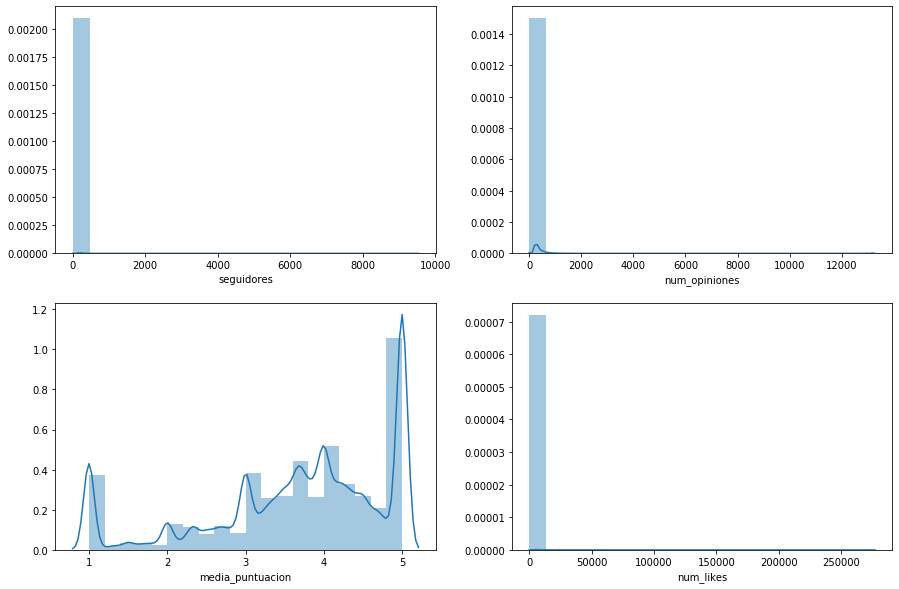

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

fig=plt.figure(figsize=(15,10))

ax = fig.add_subplot(2, 2, 1)
ax = sns.distplot(df_users_limpio['seguidores'], bins = 20);

ax = fig.add_subplot(2, 2, 2)
ax = sns.distplot(df_users_limpio['num_opiniones'], bins = 20);

ax = fig.add_subplot(2, 2, 3)
ax = sns.distplot(df_users_limpio['media_puntuacion'], bins = 20);

ax = fig.add_subplot(2, 2, 4)
ax = sns.distplot(df_users_limpio['num_likes'], bins = 20);

Los histogramas que obtenemos son anómalos por varios motivos:
- Según los histogramas, por ejemplo, no existe prácticamente ningún usuario con una cantidad de likes superior a 50.000. Obviamente, esto es imposible, ya que en el análisis previo nos hemos percatado de que existen varias personas que sí cumplen esta condición. En este caso, nos encontramos ante un problema de representación de la información y de posible clusterización; la cantidad de personas con muy pocos likes, muy pocas opiniones y muy pocos seguidores es **realmente alta**, por lo que deberíamos tratarlos por separado.


- El único histograma que aparece distinto es el de puntuación. Básicamente, esto se debe a que muchos usuarios que no reciben likes, no tienen seguidores y no tienen opiniones, sí puntúan otras opiniones. Como recordatorio, la media de puntuación hace referencia a **la media de puntuación que el usuario le ha dado a otras personas**. En estos histogramas, lo que está ocurriendo es que las distribuciones de los datos de los usuarios más frecuentes (los que menos likes, seguidores y opiniones tienen) destacan frente al resto de distribuciones. Por este motivo, podemos ver que, por ejemplo en el número de likes, la barra próxima al 0 es tan alta.

Al tener una cantidad de datos tan extremadamente alta, es normal que nos encontremos con este problema. La forma de abordar estos temas es mediante el uso de clusterización con el objetivo de separar instancias (en este caso, usuarios) en distintas categorías. De esta forma, podremos sacar conclusiones más precisas.

Con la clusterización que planteamos pretendemos diferenciar entre personas populares y personas no tan populares, lo que hemos denominado **"influencers"**. Después de haber estado pensando en qué variables pueden ser las más acertadas para hacer la clusterización, llegamos a las siguientes conclusiones:

- **seguidores**: Pensamos que es una de las variables más importantes para diferenciar entre distintos tipos de usuarios según popularidad. Sabemos que la gran mayoría de los usuarios no tienen apenas seguidores o directamente no tienen, pero esto puede permitirnos diferenciar a usuarios más alejados de lo normal que puedan tener utilidad ("influencers").


- **num_likes**: Al igual que seguidores, consideramos que el número de likes es una variable muy importante. Los likes pueden ser capaces de diferenciar distintos tipos de usuarios. Se debe diferenciar entre personas que reciben muchos likes (personas que normalmente van a tener muchas publicaciones o seguidores, o algo parecido) y personas con menos likes. Una persona que recibe muchos likes puede recibirlos ya que tiene muchas opiniones o las pocas que tiene son muy visitadas por la gente.


- **num_opiniones**: Para diferenciar lo dicho anteriormente, necesitamos saber si tienen muchas o pocas opiniones. No podemos comparar al mismo nivel a aquellas personas que tienen muchas publicaciones con las que no tienen apenas.

Estas serían las columnas que tendríamos en cuenta en caso de hacer una clusterización con el objetivo previamente indicado. Somos conscientes de que hay variables que también podrían llegar a ser útiles, como por ejemplo los siguientes:

- **util, gracioso, guay y media de puntuación**: Las tres primeras variables son un número que indica la cantidad de veces que se ha puntuado una opinion como útil, graciosa o guay, respectivamente. La última (media de puntuación) indica la media de puntuación que el usuario le da a los negocios a los que acude. Estas cuatro variables pueden llegar a diferenciar entre **usuarios críticos y no tan críticos**. Para la tarea que mencionamos anteriormente (encontrar influencers), no nos son tan útiles estas variables, pero podríamos llegar a tenerlas en cuenta más adelante.


- 


- **anyoExperto y experiencia**: Sería normal pensar que a medida que aumenta el número de años que se ha sido experto o el número de años desde el registro, las opiniones sean mejores y, por lo tanto, los likes también. Sin embargo, hay algunos casos en los que se tienen muchas opiniones, seguidores, etc.. pero no se ha sido experto ningún año. Un ejemplo de este caso es el siguiente:


In [41]:
df_users_limpio[df_users_limpio['num_likes'] > 200000]

,usuario_id,nombre,num_opiniones,util,gracioso,guay,experto,anyoExperto,amigos,num_amigos,seguidores,media_puntuacion,like_moda,like_extras,like_perfil,like_formato,like_lista,like_comentario,like_simple,like_guay,like_divertido,like_textos,like_fotos,num_likes,anyo_reg,experiencia,mes_reg,dia_reg,hora_reg,categoria
179457,JjXuiru1_ONzDkYVrHN0aw,Richard,1086,99162,77758,93938,"2011,2012,2013,2014,2015,2016,2017,2018",8,"MFI4twbiz8UJxU-XHSlH-g, Rjb-gVuAeS9h75Svz0aYsg...",4716,1434,4.12,16245,3637,5990,2829,2332,10139,52103,32266,32266,12128,44390,214325,2009,9,8,23,13,3
1146706,Tqm7Wu7IBJ1td3Ab5ZpUhw,Brian,1998,45970,35437,44267,Ninguno,0,"4P8EDoVkcSLJs2XP5DJIPg, N6tzBF-6Lx3Mip-w_C0E9g...",917,297,4.27,24328,13500,14173,13654,12669,15907,24928,29937,29937,15442,82602,277077,2009,9,1,1,2,3


Es un ejemplo muy concreto que hemos visto a lo largo de la experimentación, pero nos parece válido para justificar la idea mencionada en el punto anterior. Como se puede observar, Brian tiene 0 años como experto pero tiene una cantidad de "guay", "util" y likes realmente elevada.

Nuestro primer acercamiento a clusterización con este conjunto de datos fue intentar hacerlo con solo una variable. De esta forma, queríamos comprobar 

[[9.03814120e-01]
 [7.29821293e+02]
 [9.53800000e+03]
 [1.13072588e+02]]
[0 0 0 ... 0 0 0]


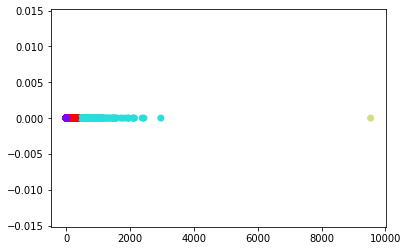

In [13]:
from sklearn.cluster import KMeans
import numpy as np
kmeans = KMeans(n_clusters=4)
kmeans.fit(df_users_limpio['seguidores'].values.reshape(-1, 1))

print(kmeans.cluster_centers_)
print(kmeans.labels_)
plt.scatter(df_users_limpio['seguidores'], np.zeros(df_users_limpio['seguidores'].values.shape[0]), c=kmeans.labels_, cmap='rainbow')
plt.show()

In [14]:
df_users_limpio[df_users_limpio['seguidores'] > 8000]

,usuario_id,nombre,num_opiniones,util,gracioso,guay,experto,anyoExperto,amigos,num_amigos,seguidores,media_puntuacion,like_moda,like_extras,like_perfil,like_formato,like_lista,like_comentario,like_simple,like_guay,like_divertido,like_textos,like_fotos,num_likes,anyo_reg,experiencia,mes_reg,dia_reg,hora_reg
822302,37cpUoM8hlkSQfReIEBd-Q,Mike,1634,19715,10085,13227,"2012,2013,2014,2015,2016,2017,2018",7,"C8vMgFk7K1luWh3tUY_g7A, i1KRBtPqEPqelfP5NaiRmw...",5591,9538,4.3,359,101,51,115,27,401,640,934,934,472,1493,5527,2009,9,4,25,14


MIKE NOS ESTA JODIENDO y está generando un cluster por su cuenta. Decidimos eliminar a mike ya que no nos aporta información valiosa generalizable.

In [15]:
df_users_limpio = df_users_limpio.drop(822302, axis=0)

In [16]:
import pandas as pd
from sklearn import preprocessing

kmediasVar = ['seguidores', 'num_likes', 'num_opiniones']

x = df_users_limpio[kmediasVar].values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df_users_kmedias = pd.DataFrame(x_scaled, columns=kmediasVar)
df_users_kmedias

,seguidores,num_likes,num_opiniones
0,0.001687,0.000029,0.007155
1,0.001350,0.000011,0.002485
2,0.000000,0.000004,0.001205
3,0.001687,0.000014,0.001280
4,0.013158,0.001057,0.027188
...,...,...,...
1637132,0.000000,0.000000,0.000151
1637133,0.000000,0.000000,0.000603
1637134,0.000000,0.000000,0.000301
1637135,0.000000,0.000000,0.000075


In [17]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(df_users_kmedias)

print(kmeans.cluster_centers_)
print(kmeans.labels_)
# plt.scatter(df_users_limpio['seguidores'], np.zeros(df_users_limpio['seguidores'].values.shape[0]), c=kmeans.labels_, cmap='rainbow')
# plt.show()


[[1.61916033e-04 6.82009618e-06 9.68858666e-04]
 [6.78023167e-03 6.67158485e-04 1.91369864e-02]
 [4.03891339e-02 8.35743378e-03 6.68669173e-02]
 [2.59071489e-01 7.49309119e-02 1.53219155e-01]]
[0 0 0 ... 0 0 0]


In [18]:
df_users_limpio['categoria'] = kmeans.labels_

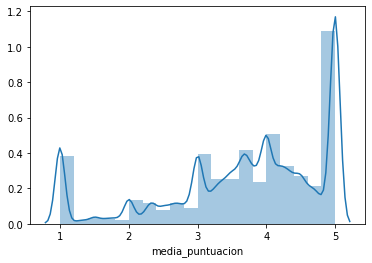

In [40]:
ax = sns.distplot(df_users_limpio[df_users_limpio['categoria'] == 0]['media_puntuacion'], bins = 20);

In [20]:
df_users_limpio.groupby('categoria').describe()
# df_users_limpio[df_users_limpio['categoria'] == 2]

num_opiniones                                                  \
                  count         mean          std   min     25%     50%   
categoria                                                                 
0             1586582.0    12.862444    20.765327   0.0     2.0     5.0   
1               45850.0   254.015856   118.172839   1.0   167.0   215.0   
2                4482.0   887.722668   418.342408   4.0   644.0   798.0   
3                 223.0  2034.443946  1792.135116  71.0  1025.0  1552.0   

                                 util                                      \
              75%      max      count          mean           std     min   
categoria                                                                   
0            14.0    150.0  1586582.0     13.551783     33.802143     0.0   
1           308.0    770.0    45850.0    497.235202    539.736879     1.0   
2          1041.0   4710.0     4482.0   3750.585007   4061.827087    12.0   
3          2378.0  13278.0      223.0  23409.645740  18784.683692  3850.0   

                                                   gracioso                \
                25%      50%       75%       max      count          mean   
categoria                                                                   
0              0.00      3.0     11.00    4488.0  1586582.0      3.909474   
1            203.00    339.0    598.00   21707.0    45850.0    218.853893   
2           1538.25   2541.5   4413.25   78486.0     4482.0   2140.996653   
3          11947.50  17724.0  29063.00  154202.0      223.0  15653.816143   

                                                                       \
                    std     min      25%      50%       75%       max   
categoria                                                               
0             16.356021     0.0     0.00      0.0      2.00    3468.0   
1            375.807626     0.0    54.00    110.0    233.00   21126.0   
2           2902.809174     0.0   565.25   1163.0   2558.25   49550.0   
3          16026.345582  1597.0  6563.50  10525.0  19225.00  130207.0   

                guay                                                       \
               count          mean           std     min     25%      50%   
categoria                                                                   
0          1586582.0      4.150919     16.296879     0.0     0.0      0.0   
1            45850.0    270.423097    442.107075     0.0    69.0    139.0   
2             4482.0   2775.263945   3722.560244     8.0   778.0   1593.5   
3              223.0  19662.340807  17698.832396  2768.0  8714.0  15011.0   

                             anyoExperto                                     \
               75%       max       count      mean       std  min  25%  50%   
categoria                                                                     
0              3.0    3070.0   1586582.0  0.038841  0.297610  0.0  0.0  0.0   
1            297.0   21527.0     45850.0  2.895551  2.432167  0.0  0.0  3.0   
2           3289.5   70825.0      4482.0  6.329987  3.051772  0.0  4.0  7.0   
3          23652.5  148658.0       223.0  7.784753  3.091450  0.0  6.0  8.0   

                      num_amigos                                           \
            75%   max      count         mean          std    min     25%   
categoria                                                                   
0           0.0   8.0  1586582.0    37.879987    94.606261    0.0     0.0   
1           4.0  13.0    45850.0   215.768375   292.832271    0.0    50.0   
2           9.0  13.0     4482.0   881.396475   945.892875    0.0   310.0   
3          10.0  13.0      223.0  4006.080717  2005.176834  279.0  2422.5   

                                    seguidores                                 \
              50%      75%      max      count        mean         std    min   
categoria                                                                       
0             2

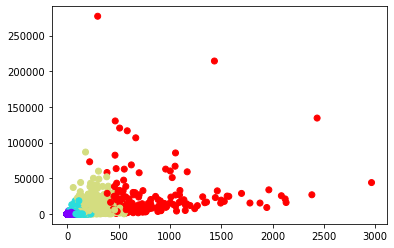

In [21]:
plt.scatter(df_users_limpio['seguidores'], df_users_limpio['num_likes'], c=kmeans.labels_, cmap='rainbow')

<Figure size 1080x720 with 0 Axes>

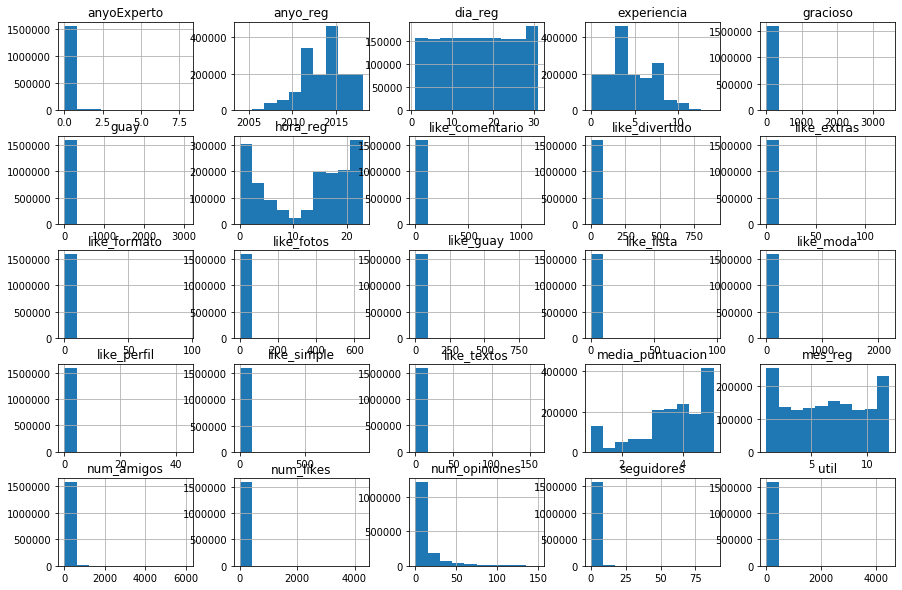

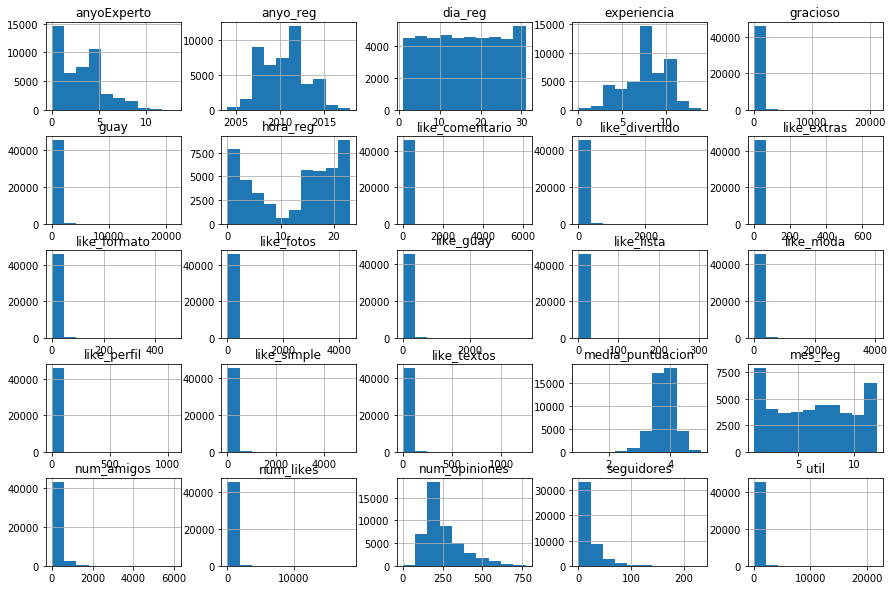

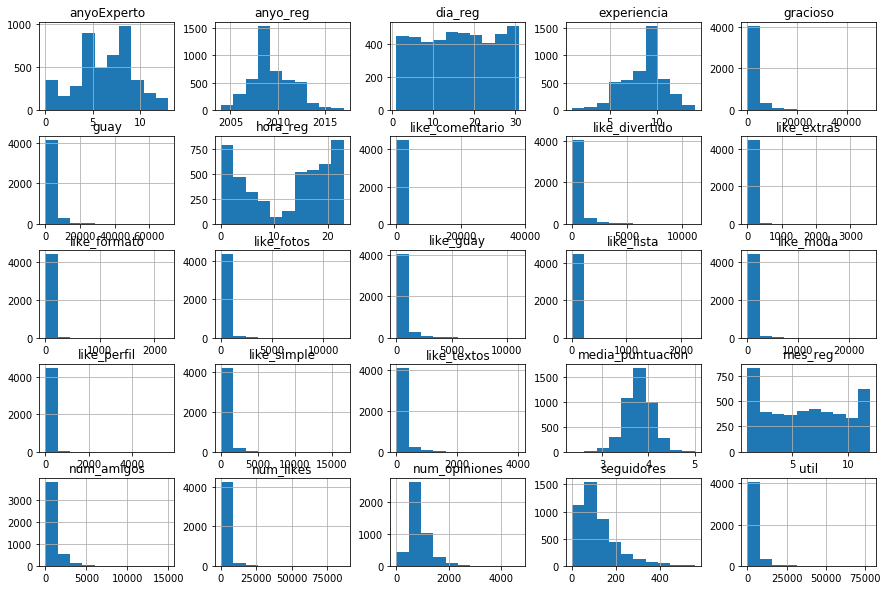

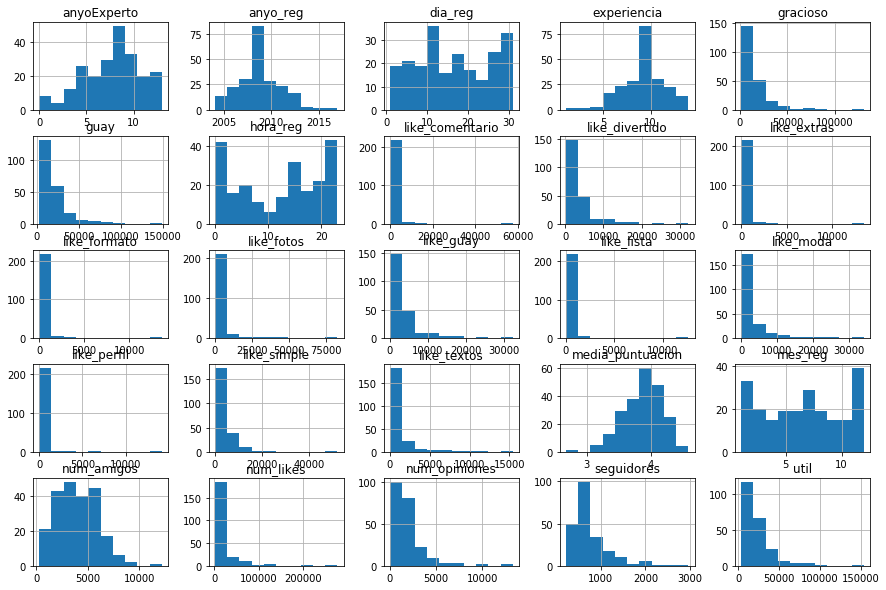

In [26]:
fig = plt.figure(figsize=(15,10))
ax = df_users_limpio.groupby('categoria').hist(figsize=(15, 10))
plt.show()

[[5.57648633e-01 7.76493793e+01]
 [5.16531714e+00 5.20895974e+02]
 [2.72541644e+00 2.32772134e+02]
 [7.11111111e+00 8.86766667e+03]
 [6.67329545e+00 1.08344650e+03]
 [2.91274060e-03 7.82717876e+00]
 [7.76491228e+00 2.34053333e+03]]
[0 5 5 ... 5 5 5]


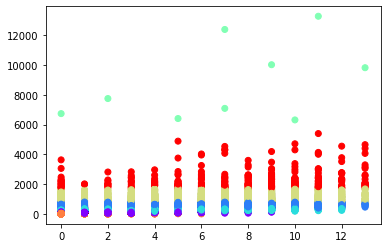

In [24]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=7)
kmeans.fit(df_users_limpio[['anyoExperto', 'num_opiniones']])

print(kmeans.cluster_centers_)
print(kmeans.labels_)
plt.scatter(df_users_limpio['anyoExperto'], df_users_limpio['num_opiniones'], c=kmeans.labels_, cmap='rainbow')
plt.show()

In [25]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=7)
kmeans.fit(df_users_limpio[['anyoExperto', 'num_opiniones', 'seguidores', '']])

print(kmeans.cluster_centers_)
print(kmeans.labels_)
plt.scatter(df_users_limpio['anyoExperto'], df_users_limpio['num_opiniones'], c=kmeans.labels_, cmap='rainbow')
plt.show()

KeyError: "[''] not in index"

Cosas que podemos hacer:
- Clusterización jerárquica 
- Hacer un cluster con los números de usuarios para poder discretizarlos correctamente y poder hacer boxplot y encontrar overlies. 
- Podríamos diferenciar en algún punto entre los usuarios que tienen alguna opinion y los usuarios que no.
- Hacer boxplot y distribuciones que nos puedan hacer detectar overlies.
    - 

- Detectar spammers reconociendo aquellas personas con muy poca puntuación y muchísimas opiniones.
- Detectar hackers que tengan media de puntuación de opiniones de 5 y muchísimas opiniones.
- Detectar influencers discretizando por el número de opiniones o de likes.
- Detectar personas clones. Que tengan el mismo nombre, los mismos elementos menos el id.

- Ver si desaparecen algunos tipos de likes debido al desuso. Al final la empresa se queda con unos pocos likes

- Discretizar entre negocios que han cerrado y los que no. Hacer análisis aparte
- Cuál es el negocio con la mayor puntuación
- Cuál es el negocio más frecuente.

In [ ]:
import seaborn as sns
sns.set(style="whitegrid")
ax = sns.violinplot(x = df_users_limpio["seguidores"][0:3000])

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
ax = sns.scatterplot(x = "num_opiniones", y = "seguidores", data = df_users_limpio)

In [ ]:
from sklearn.cluster import KMeans
import numpy as np

kmeans = KMeans(n_clusters = 2, random_state = 0).fit(df_users_limpio[['seguidores', 'num_opiniones']])
print(kmeans.labels_)
print(kmeans.cluster_centers_)